# Imports

In [1]:
#imports 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import csv files 
#bureau_balance = pd.read_csv("bureau_balance.csv")
#bureau = pd.read_csv("bureau.csv")
#credit_card_balance = pd.read_csv("credit_card_balance.csv")
#home_credit = pd.read_csv("HomeCredit_columns_description.csv")
#installments_payments = pd.read_csv("installments_payments.csv")
#pos_cash_balance = pd.read_csv("POS_CASH_balance.csv")
#previous_apps = pd.read_csv("previous_application.csv")
#sample_submission = pd.read_csv("sample_submission.csv")
app_test = pd.read_csv("application_test.csv")
app_train = pd.read_csv("application_train.csv")

# Data Exploration 

In [ ]:
app_test.head()

In [ ]:
app_train.head()

Check for missing values, sort by percentage

# Filling NaN Values

In [3]:
#sum missing values 
app_train.isnull().sum().sort_values(ascending = False)[:50]/len(app_train)*100

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [4]:
#check types of app_train
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Use Label encoder for categorical columns with less than two unique values, otherwise the assigned numbers are meaningless. 

In [5]:

labelencoder = LabelEncoder()
labelencoder_count = 0
for column in app_train:
    if app_train[column].dtype == 'object':
         if len(list(app_train[column].unique())) <= 2:
                labelencoder.fit(app_train[column])
                app_train[column] = labelencoder.transform(app_train[column])
                app_test[column] = labelencoder.transform(app_test[column])
                labelencoder_count += 1
print('%d columns were label encoded.' % labelencoder_count)

3 columns were label encoded.


Use one-hot encoding for categorical columns with more than two values 

In [6]:
categorical_columns = [col for col in app_train.columns if app_train[col].dtype == 'object']
categorical_columns_test = [col for col in app_test.columns if app_test[col].dtype == 'object']
app_train = pd.get_dummies(app_train, columns= categorical_columns, dummy_na= True)
app_test = pd.get_dummies(app_test, columns= categorical_columns_test, dummy_na= True)

In [7]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,1,0,0,1,0,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,1,0,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,1,0,0,1
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,1,0,0,1
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,1,0,0,1


In [8]:
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 256)
Testing Features shape:  (48744, 252)


# Inner Join Data

In [9]:
#align test and train data 
#first take out the target column
app_train['TARGET']
train_labels = app_train['TARGET']

In [10]:
#perform an inner join on test and train 
#inner keeps all records matching the index field values that are present in both the left hand side and right hand side dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

In [11]:
#put the target column back in 
app_train['TARGET'] = train_labels

In [12]:
app_train.shape

(307511, 253)

In [13]:
app_test.shape

(48744, 252)

# Check for Anamolies

In [14]:

app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Text(0.5,0,'Days Birth')

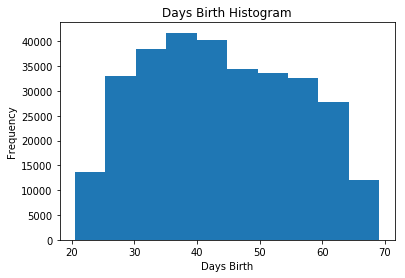

In [15]:
(app_train['DAYS_BIRTH']/ -365).plot.hist(title = 'Days Birth Histogram')
plt.xlabel('Days Birth')

In [16]:
app_train['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

Text(0.5,0,'Days Last Phone Change')

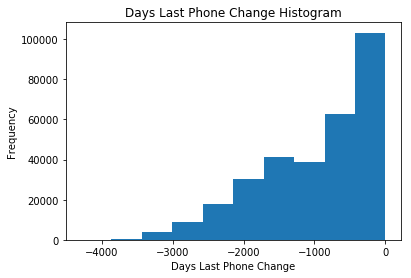

In [17]:
app_train['DAYS_LAST_PHONE_CHANGE'].plot.hist(title = 'Days Last Phone Change Histogram')
plt.xlabel('Days Last Phone Change')

In [18]:
app_train['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

Text(0.5,0,'Price')

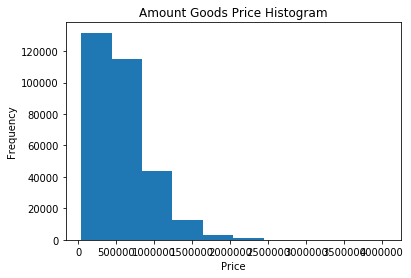

In [19]:
app_train['AMT_GOODS_PRICE'].plot.hist(title = 'Amount Goods Price Histogram')
plt.xlabel('Price')

In [20]:
app_train['DAYS_EMPLOYED'].describe()
#max value is about 

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

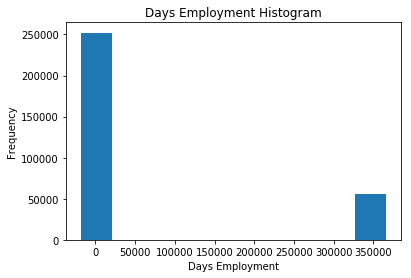

In [21]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');
#all anomalies have the same exact value 

^ graph does not look right, we have to set the anamolies to a missing value


In [22]:
#make a new anomoly column indicating whether or not the value was anomalous (boolean)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

In [23]:
 
#set the anomalies to a missing value and then have them filled in
#the anomalies have the exact same value, so we want to fill them in with the same value
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
app_train['DAYS_EMPLOYED'] == 365243

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
307481    False
307482    False
307483    False
307484    False
307485    False
307486    False
307487    False
307488    False
307489    False
307490    False
307491    False
307492    False
307493    False
307494    False
307495    False
307496    False
307497    False
307498    False
307499    False
307500    False
307501    False
307502    False
307503    False
307504    False
307505    False
307506    False
307507    False
307508    False
307509    False
307510    False
Name: DAYS_EMPLOYED, Len

In [24]:
#check anomalies column 
app_train['DAYS_EMPLOYED_ANOM'] 

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8          True
9         False
10        False
11         True
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23         True
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
307481    False
307482    False
307483     True
307484    False
307485    False
307486    False
307487     True
307488    False
307489    False
307490    False
307491    False
307492    False
307493    False
307494    False
307495    False
307496    False
307497    False
307498    False
307499    False
307500    False
307501    False
307502    False
307503    False
307504    False
307505     True
307506    False
307507     True
307508    False
307509    False
307510    False
Name: DAYS_EMPLOYED_ANOM

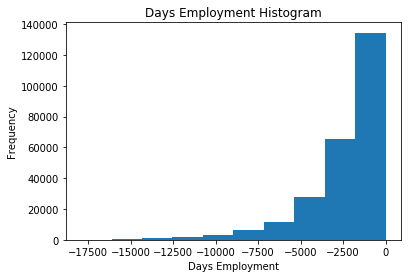

In [25]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');


In [26]:
#do the same for test data 
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# Find Important Correlations

In [27]:
#find correlations between columns and target to see what columns are most correlated 
correlations = app_train.corr()['TARGET'].sort_values()

In [28]:
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 CODE_GENDER_M                     0.054713
DAYS_LAST_PHONE_CHANGE            0.055218
NAME_INCOME_TYPE_Working          0.057481
REGION_RATING_CLIENT              0.058899
REGION_RATING_CLIENT_W_CITY       0.060893
DAYS_EMPLOYED                     0.074958
DAYS_BIRTH                        0.078239
TARGET                            1.000000
CODE_GENDER_nan                        NaN
NAME_INCOME_TYPE_nan                   NaN
NAME_EDUCATION_TYPE_nan                NaN
NAME_FAMILY_STATUS_nan                 NaN
NAME_HOUSING_TYPE_nan                  NaN
WEEKDAY_APPR_PROCESS_START_nan         NaN
ORGANIZATION_TYPE_nan                  NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensi

In [29]:
#delete columns with no correlation 
del app_train['CODE_GENDER_nan']
del app_train['NAME_INCOME_TYPE_nan']
del app_train['NAME_EDUCATION_TYPE_nan']
del app_train['NAME_FAMILY_STATUS_nan']
del app_train['NAME_HOUSING_TYPE_nan']
del app_train['WEEKDAY_APPR_PROCESS_START_nan']
del app_train['ORGANIZATION_TYPE_nan']


In [30]:
#do the same for app test 
del app_test['CODE_GENDER_nan']
del app_test['NAME_INCOME_TYPE_nan']
del app_test['NAME_EDUCATION_TYPE_nan']
del app_test['NAME_FAMILY_STATUS_nan']
del app_test['NAME_HOUSING_TYPE_nan']
del app_test['WEEKDAY_APPR_PROCESS_START_nan']
del app_test['ORGANIZATION_TYPE_nan']



In [ ]:
#re-check correlations
correlations = app_train.corr()['TARGET'].sort_values()

In [ ]:
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

In [ ]:
app_train.shape

In [ ]:
app_test.shape

In [ ]:
#most posotive correlation is days birth, days employed,  
#most negative correlation is ext_source_3, ext source 2, ext source 1 

# Create polynomial features 

make features that are powers of existing features as well as interaction terms between existing features from the columns with the strongest correlation 


In [31]:
#create an updated dataframe for poly features 
app_features_train = app_train[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'TARGET']]
app_features_test = app_test[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1']]

In [32]:
#imputer for handling missing values (NaN)
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')
poly_target = app_features_train['TARGET']

In [33]:
#drop target column 
app_features_train = app_features_train.drop(columns = ['TARGET'])

In [34]:
#impute missing values 
app_features_train = imputer.fit_transform(app_features_train)
app_features_test = imputer.transform(app_features_test)

In [35]:
from sklearn.preprocessing import PolynomialFeatures


In [36]:
#create polynomial object with features up to a degree of 3 
poly_transformer = PolynomialFeatures(degree = 3)

In [37]:
#train the app_train_features
poly_transformer.fit(app_features_train)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [38]:
#transform the features 
app_features_train = poly_transformer.transform(app_features_train)
app_features_test = poly_transformer.transform(app_features_test)




In [39]:
#look at the 56 new features that were created 
feature_names = poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_EMPLOYED','DAYS_BIRTH'])
print(feature_names)


['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2', 'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_EMPLOYED', 'EXT_SOURCE_1 DAYS_BIRTH', 'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3', 'EXT_SOURCE_2 DAYS_EMPLOYED', 'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2', 'EXT_SOURCE_3 DAYS_EMPLOYED', 'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_EMPLOYED^2', 'DAYS_EMPLOYED DAYS_BIRTH', 'DAYS_BIRTH^2', 'EXT_SOURCE_1^3', 'EXT_SOURCE_1^2 EXT_SOURCE_2', 'EXT_SOURCE_1^2 EXT_SOURCE_3', 'EXT_SOURCE_1^2 DAYS_EMPLOYED', 'EXT_SOURCE_1^2 DAYS_BIRTH', 'EXT_SOURCE_1 EXT_SOURCE_2^2', 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3', 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_EMPLOYED', 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_1 EXT_SOURCE_3^2', 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_EMPLOYED', 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH', 'EXT_SOURCE_1 DAYS_EMPLOYED^2', 'EXT_SOURCE_1 DAYS_EMPLOYED DAYS_BIRTH', 'EXT_SOURCE_1 DAYS_BIRTH^2', 'EXT_SOURCE_2^3', 'EXT_SOUR

In [40]:
#create a data frame of new features 
feature_df = pd.DataFrame(app_features_train, columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_EMPLOYED','DAYS_BIRTH']))

In [41]:
feature_df.head()

,1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_EMPLOYED,DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_EMPLOYED,...,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_EMPLOYED,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_EMPLOYED^2,EXT_SOURCE_3 DAYS_EMPLOYED DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_EMPLOYED^3,DAYS_EMPLOYED^2 DAYS_BIRTH,DAYS_EMPLOYED DAYS_BIRTH^2,DAYS_BIRTH^3
0,1.0,-9461.0,-637.0,0.139376,0.262949,0.083037,89510521.0,6026657.0,-1318.634256,-2487.756636,...,0.002707,0.005108,0.001613,0.009637,0.003043,0.000961,0.018181,0.005741,0.001813,0.000573
1,1.0,-16765.0,-1188.0,0.535276,0.622246,0.311267,281065225.0,19916820.0,-8973.906339,-10431.950422,...,0.153368,0.178286,0.089185,0.207254,0.103675,0.051861,0.240927,0.120520,0.060288,0.030158
2,1.0,-19046.0,-225.0,0.729567,0.555912,0.505998,362750116.0,4285350.0,-13895.327191,-10587.901540,...,0.388325,0.295894,0.269326,0.225464,0.205220,0.186794,0.171798,0.156373,0.142332,0.129553
3,1.0,-19005.0,-3039.0,0.535276,0.650442,0.505998,361190025.0,57756195.0,-10172.925140,-12361.644326,...,0.153368,0.186365,0.144979,0.226462,0.176171,0.137049,0.275185,0.214075,0.166535,0.129553
4,1.0,-19932.0,-3038.0,0.535276,0.322738,0.505998,397284624.0,60553416.0,-10669.126224,-6432.819536,...,0.153368,0.092471,0.144979,0.055754,0.087413,0.137049,0.033616,0.052705,0.082632,0.129553


In [42]:
#add in target 
feature_df['TARGET'] = poly_target

In [43]:
feature_df.head()

,1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_EMPLOYED,DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_EMPLOYED,...,EXT_SOURCE_3^2 DAYS_EMPLOYED,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_EMPLOYED^2,EXT_SOURCE_3 DAYS_EMPLOYED DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_EMPLOYED^3,DAYS_EMPLOYED^2 DAYS_BIRTH,DAYS_EMPLOYED DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET
0,1.0,-9461.0,-637.0,0.139376,0.262949,0.083037,89510521.0,6026657.0,-1318.634256,-2487.756636,...,0.005108,0.001613,0.009637,0.003043,0.000961,0.018181,0.005741,0.001813,0.000573,1
1,1.0,-16765.0,-1188.0,0.535276,0.622246,0.311267,281065225.0,19916820.0,-8973.906339,-10431.950422,...,0.178286,0.089185,0.207254,0.103675,0.051861,0.240927,0.120520,0.060288,0.030158,0
2,1.0,-19046.0,-225.0,0.729567,0.555912,0.505998,362750116.0,4285350.0,-13895.327191,-10587.901540,...,0.295894,0.269326,0.225464,0.205220,0.186794,0.171798,0.156373,0.142332,0.129553,0
3,1.0,-19005.0,-3039.0,0.535276,0.650442,0.505998,361190025.0,57756195.0,-10172.925140,-12361.644326,...,0.186365,0.144979,0.226462,0.176171,0.137049,0.275185,0.214075,0.166535,0.129553,0
4,1.0,-19932.0,-3038.0,0.535276,0.322738,0.505998,397284624.0,60553416.0,-10669.126224,-6432.819536,...,0.092471,0.144979,0.055754,0.087413,0.137049,0.033616,0.052705,0.082632,0.129553,0


In [44]:
#merge polynomial features into training data frame 
feature_df['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(feature_df, on = 'SK_ID_CURR', how = 'left')

In [45]:
#merge polynomial features into testing data frame
feature_df['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(feature_df, on = 'SK_ID_CURR', how = 'left')

In [46]:
#allign the data frames
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

In [47]:
app_train_poly.shape

(307511, 302)

In [48]:
app_test_poly.shape

(48744, 302)

In [49]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
app_train_poly.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH_x,DAYS_EMPLOYED_x,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1_x,EXT_SOURCE_2_x,EXT_SOURCE_3_x,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_C

In [50]:
#Fill Nans with median
app_train_poly = app_train_poly.fillna(app_train_poly.median())
app_test_poly = app_test_poly.fillna(app_test_poly.median())

In [51]:

app_test_poly.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH_x,DAYS_EMPLOYED_x,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1_x,EXT_SOURCE_2_x,EXT_SOURCE_3_x,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_C

In [52]:
app_test_poly.isnull().sum().sort_values(ascending = False)


DAYS_BIRTH^3                                         0
FLAG_DOCUMENT_14                                     0
FLAG_DOCUMENT_16                                     0
FLAG_DOCUMENT_17                                     0
FLAG_DOCUMENT_18                                     0
FLAG_DOCUMENT_19                                     0
FLAG_DOCUMENT_20                                     0
FLAG_DOCUMENT_21                                     0
AMT_REQ_CREDIT_BUREAU_HOUR                           0
AMT_REQ_CREDIT_BUREAU_DAY                            0
AMT_REQ_CREDIT_BUREAU_WEEK                           0
AMT_REQ_CREDIT_BUREAU_MON                            0
AMT_REQ_CREDIT_BUREAU_QRT                            0
AMT_REQ_CREDIT_BUREAU_YEAR                           0
CODE_GENDER_F                                        0
CODE_GENDER_M                                        0
NAME_TYPE_SUITE_Children                             0
FLAG_DOCUMENT_15                                     0
FLAG_DOCUM

In [53]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
app_train_poly.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH_x,DAYS_EMPLOYED_x,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1_x,EXT_SOURCE_2_x,EXT_SOURCE_3_x,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_C

# Random Forest Classifier - Submission 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, Imputer

In [56]:
#setting X_train and Y_train
#X_train = app_train_poly
Y_train = app_train['TARGET']


In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100 , max_depth = 5, min_samples_leaf = 4, max_features = 0.5)

In [ ]:
#train on the training data 
random_forest.fit(app_train_poly, Y_train)

In [ ]:
#Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': app_train_poly, 'importance': feature_importance_values})
#print(feature_importance_values)
#feature_importance_values.shape

In [ ]:
predictions = random_forest.predict_proba(app_test_poly)[:, 1]

In [ ]:
print(predictions)

Submit Random Forest CSV 

In [ ]:
submit = app_test[['SK_ID_CURR']]

In [ ]:
submit['TARGET'] = predictions

In [ ]:
#submit.to_csv('random_forest_baseline.csv', index = False)
#score = 0.511

In [ ]:
submit.head()

# Light GBM - Submission Two 

"Light GBM splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’."

In [ ]:
from lightgbm import LGBMClassifier
LGB_clf = LGBMClassifier(n_estimators=100, 
                         boosting_type='gbdt', 
                         objective='binary', 
                         metric='binary_logloss')


In [ ]:
LGB_clf.fit(app_train_poly, Y_train)


In [ ]:
LGB_clf_pred = LGB_clf.predict_proba(app_test_poly)[:, 1]

In [ ]:
print(LGB_clf_pred)

In [ ]:
submit2 = app_test[['SK_ID_CURR']]

In [ ]:
submit2['TARGET'] = LGB_clf_pred

In [ ]:
submit2.head()

In [ ]:
#submit2.to_csv('lightgbm.csv', index = False)
#score = 0.582

# Refined LGM - Submission 3 

In [ ]:
LGBM_clf = LGBMClassifier(n_estimators = 10000,
                          learning_rate = 0.02,
                          min_data_in_leaf = 30,
                          num_leaves = 31,
                          boosting_type='gbdt', 
                          objective='binary', 
                          metric='binary_logloss')

In [ ]:
LGBM_clf.fit(app_train_poly, Y_train)


In [ ]:
LGBM_clf_pred = LGBM_clf.predict_proba(app_test_poly)[:, 1]

In [ ]:
print(LGBM_clf_pred )

In [ ]:
submit3 = app_test[['SK_ID_CURR']]

In [ ]:
submit3['TARGET'] = LGBM_clf_pred

In [ ]:
#submit3.to_csv('lightgbm2.csv', index = False)
#score = 0.614

# XG Boost 

In [ ]:
feature_df.head()

In [58]:
import xgboost as xgb
clf_xgBoost = xgb.XGBClassifier(
    learning_rate =0.01, n_estimators=1000, max_depth=4, min_child_weight=4, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', 
            nthread=4, scale_pos_weight=2, seed=27)

In [59]:
clf_xgBoost.fit(app_train_poly,Y_train)

KeyboardInterrupt: 

In [ ]:
pred = clf_xgBoost.predict_proba(app_test_poly)[:, 1]

In [ ]:
from sklearn import metrics 
metrics.roc_auc_score(Y_train, pred)